<a href="https://colab.research.google.com/github/DhanrajTiwari/Mobile-Price-Range-Prediction/blob/main/Dhanraj_Tiwari_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost),
2(high cost) and 3(very high cost).

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Importing the needed libraries to make a prediction.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_mobile_price_range.csv')

Loading the given datasets.

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In datsets we checked and got to know that we don't have any null values in our datasets. 

In [7]:
df.shape

(2000, 21)

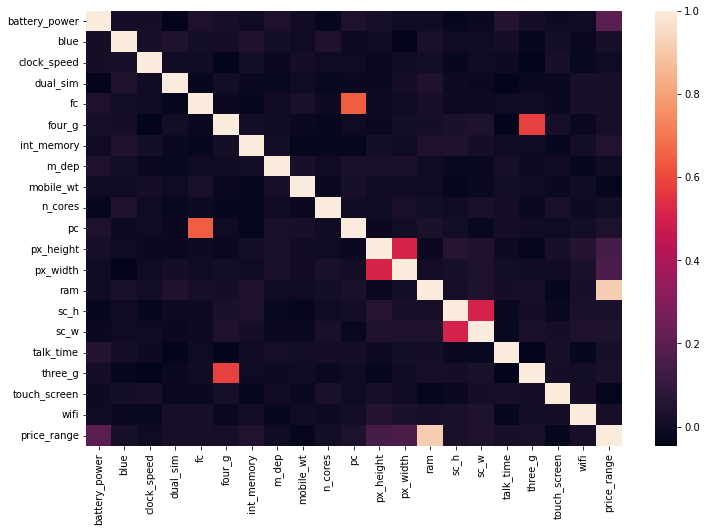

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.show()

Checking the correlation between the feature and the labels and we saw that we are good correlation with battery_power, px_width,px_height and higher correlation with ram.

Now comparing all the correlated features with the given label.

<function matplotlib.pyplot.show>

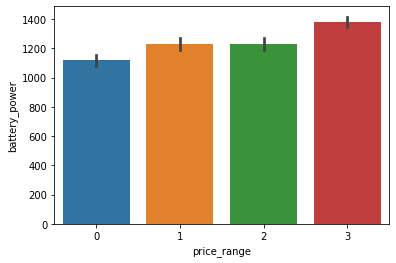

In [9]:
sns.barplot(data=df,x='price_range', y = 'battery_power')
plt.show

Price range according to the battery_power, if battery_power is 1400 or more than that then the price will be higher.

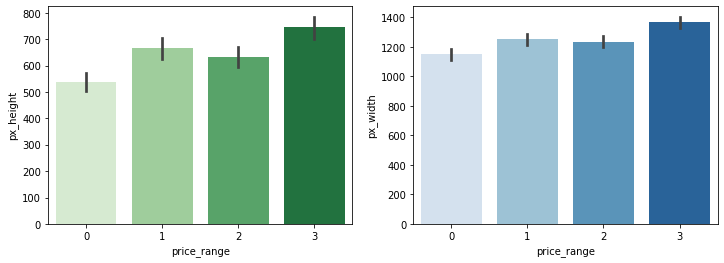

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=df, palette = 'Greens')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=df, palette = 'Blues')
plt.show()




And also same for pixels height and width, if suppose pixel height is 750 or more than price range is higher .

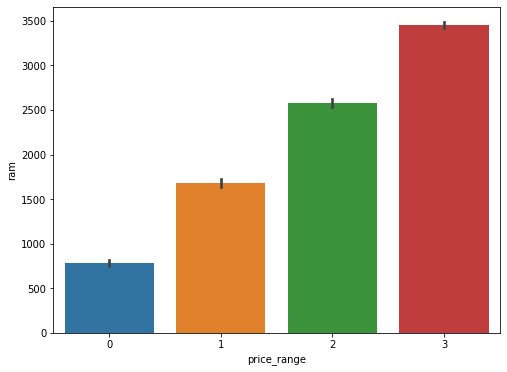

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='price_range', y='ram',data=df)
plt.show()

Price range according to the ram, if ram is 3500 or more than that then the price will be higher.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


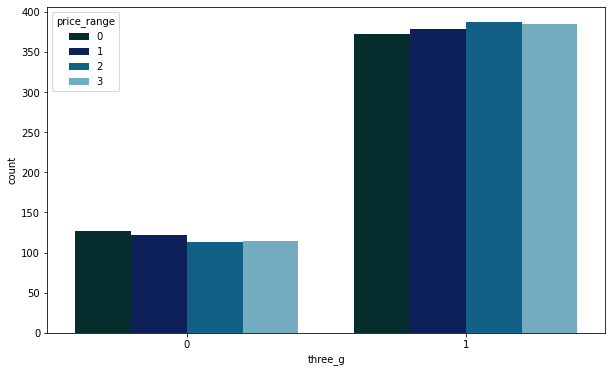

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['three_g'],hue = df['price_range'],palette = 'ocean')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


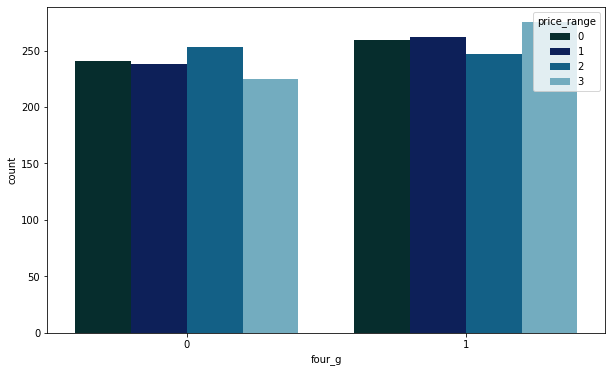

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['four_g'],hue=df['price_range'],palette='ocean')
plt.show()

In [14]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Now we going for training and testing of the model.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

Here we used KNeighborsClassifier which takes it's 15 nearest datapoint and predict the accuracy

In [17]:
KNN.score(x_train, y_train)

0.9425

In [18]:
pred = KNN.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.955

By using KNN we are getting the accuracy which is 0.942 for trained dataset and .955 for test data.

In [20]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(x_train, y_train)

GaussianNB()

In [26]:
g.score(x_train, y_train)

0.81625

In [21]:
PRED = g.predict(x_test)

In [22]:
accuracy_score(y_test,PRED)

0.835

Naive bayes is not giving good accuracy so further we will check with some more classification techniques.

In [23]:
from sklearn import svm
S=svm.SVC(decision_function_shape='ovo')
S.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [27]:
S.score(x_train, y_train)

0.954375

In [24]:
Predict = S.predict(x_test)

In [25]:
accuracy_score(Predict,y_test)

0.955

**Conclusion**

After using many classification techniques we get to know that the K-nearest neighbors and Support Vector Machine gives us the good accuracy.